***INTRODUCCIÓN A OPTIMIZACIÓN CON PYTHON***
Lo básico en un problema de optimización es tener una función objetivo y un optimizador.

In [2]:
# cargamos paquestes básicos y optimize
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize as opt

Optimization terminated successfully.
         Current function value: 14.750000
         Iterations: 18
         Function evaluations: 36
minimo en [2.5]


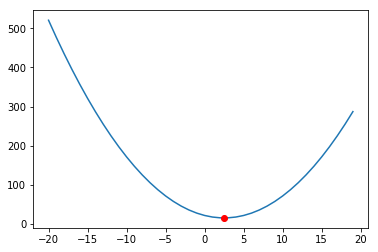

In [3]:
# ejemplo muy simple
# quiero encontrar mínimo de una parábola
def func(x):
    return (x-3)**2+x+12
x=np.arange(-20,20)
pl.plot(x,func(x))
x0=np.random.uniform(1)
xopt=opt.fmin(func,x0)
print 'minimo en', xopt
pl.plot(xopt,func(xopt),'or')

1.0 (0, None)
minimo en [2.5]


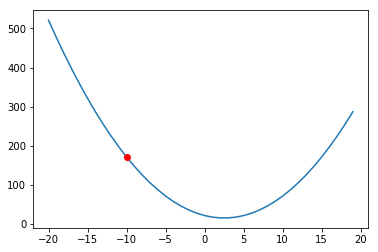

In [4]:
print x0,(0,None)
res=opt.minimize(func,x0,bounds=((-15,-10),))
pl.plot(x,func(x))

print 'minimo en', xopt
pl.plot(res.x,func(res.x),'or')

In [5]:
# Ejemplo Dieta

import pandas as pd
df = pd.read_excel("dietMedium.xls",nrows=17)

food_names = list(df['Foods'])
costs=list(df['Price/Serving'])
#costs = dict(zip(food_items,df['Price/Serving']))
costs=list(df['Price/Serving'])
calories = list(df['Calories'])
fat = list(df['Total_Fat (g)'])
carbs = list(df['Carbohydrates (g)'])
proteins=list(df['Protein (g)'])
sodium=list(df['Sodium (mg)'])
portion=list(df['Serving Size'])
fiber=list(df['Dietary_Fiber (g)'])



#print df.info()

In [6]:
# solo queremos minimizar precio:
def func(x):
    return np.sum(x*np.array(costs))

x0=np.random.uniform(size=len(food_names))
valOpt=opt.fmin(func,x0)  # minimizamos función func, y le tenemos que dar un valor inicial


print 'Total price',np.round(np.sum(valOpt*costs),2)
print 'Cantidades Alimentos',valOpt,2

# si minimizo el coste, sin ningua restricción nos pone valores negativos en las variables de tal 
# manera que sum(x*cost) tienda a -inf

Total price -1.9603948952916642e+31
Cantidades Alimentos [ 3.32957587e+29 -2.16045890e+29 -6.91684546e+29  1.87821716e+30
 -4.06888657e+29 -8.16631138e+29 -8.21936726e+30  8.28904146e+29
  2.19191498e+29 -3.07160126e+29  1.22454719e+30  3.73635864e+28
  7.39235906e+29  5.51484000e+29  4.80780133e+29  1.22175211e+29
 -6.73472999e+28] 2


In [7]:
# variables no pueden ser negativas, imponemos x>0 imponeindo limites (bounds)

# fmin útil si función tiene un mínimo acotado

# Añadimos límites, usamos opt.minimize que nos permite añadir bounds
res=opt.minimize(func,x0,bounds=len(x0)*[(0,None)])  # bounds(0,inf) para cada una de las variables 17*([0,inf])
print 'Total price',np.round(np.sum(res.x*costs),2)
print 'Cantidades Alimentos',res.x

# precio minimo --> 0

Total price 0.0
Cantidades Alimentos [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
#Ahora añadimos restricciones usando opt.linprog()
help(opt.linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, gives the values of
        the upper-bound inequality constraints at ``x``.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in ``A_ub``.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, 

In [9]:
# coeficientes que multiplican las variables en la función Lineal que queremos minimizar (precio)
c=np.array(costs)

# ligaduras:
# suma de 800 < calorías < 1300 
A0=np.array(calories)
b0=1300
# como solo acepta límites superiores, giramos esta inecuación añadiendo signo negativo a ambos lados.
A1=-np.array(calories)
B1=-800
# queremos dieta baja en sal sodium_1*x_1+sodium_2*x_2+... < 50mg
A2= np.array(sodium) 
B2= 50.

A=[A0,A1,A2]
b=[b0,B1,B2]
# si queremos alguna igualdad se puede añadir quenerando Aeq y beq de la misma forma

# ponemos valores mínimos y máximos de cada variable, en este caso x_i>=0
Bounds=(0,None)
# bounds si solo se pone uno se asume que es el mismo para todos, pero podríamos poner tantos como variables 
#(lb y ub para cada variable)

res=opt.linprog(c,A_ub=A,b_ub=b,bounds=Bounds)
print res   # nos da información de la optimización


     fun: 1.7064296536565586
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([500.,   0.,   0.])
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 3.10492734, 0.        ,
       0.        , 0.        , 0.        , 2.55009496, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])


In [10]:
# valores de x en res.x y valor final de la función objetivo en res.fun
print 'Precio Total',np.round(np.sum(res.x*c),2)
print 'Precio Total',np.round(res.fun,2)

for i in range(len(costs)):
    if res.x[i]!=0:
         print food_names[i],np.round(res.x[i],2)#,portion[i]


Precio Total 1.71
Precio Total 1.71
 Baked Potatoes 3.1
Banana 2.55


In [11]:
# Ponemos más restricciones para hacer la dieta más saludable ( y esperamos que más variada)
# coef función objetivo:
c=np.array(costs)

# ligaduras:

# 800 < sum(cal*x) <1300
A0=np.array(calories)
b0=1300
A1=-np.array(calories)
B1=-800

# grasas  20 < sum(fat*x) <50
A2= -np.array(fat) 
B2= -20.0
A3= np.array(fat) 
B3= 50.0

# carbohidratos 130 < sum(carb*x) < 200
A4= -np.array(carbs) 
B4= -130.0
A5= np.array(carbs)  
B5= 200.0

#fibra   60 < sum(fibra*x) < 125
A4= -np.array(fiber) 
B4= -60.
A5= np.array(fiber) 
B5= 125.

#  100 < sum(proteina*x) < 125
A6= -np.array(proteins) 
B6= -100.
A7= np.array(proteins) 
B7= 125.


A=[A0,A1,A2,A3,A4,A5,A6,A7]
b=[b0,B1,B2,B3,B4,B5,B6,B7]
# si queremos alguna igualdad se puede añadir quenerando Aeq y beq de la misma forma
# bounds si solo se pone uno se asume que es el mismo para todos, pero podríamos poner tantos como variables 
#(lb y ub para cada variable)
Bounds=(0,None)
res=opt.linprog(c,A_ub=A,b_ub=b,bounds=Bounds)

print 'Precio Total',np.round(res.fun,2)

pos=np.where(res.x!=0)[0]
for i in range(len(costs)):
    if res.x[i]!=0:
       print food_names[i],np.round(res.x[i],2),portion[i]

# Pidiendole que sea la más barata nunca nos va a dar el filete!

Precio Total 5.52
Frozen Broccoli 6.92 10 Oz Pkg
 Baked Potatoes 1.08 1/2 Cup
Scrambled Eggs 6.06 1 Egg


*** non linear function= quadratic optimization ***

En vez de minimizar el coste, queremos por ejemplo hacer el menú que tenga un coste más cercano a 30 dólares (a ver si así nos sale el filete ;)) 

 - utilizarmeos opt.minimize que es más general y se pueden poner tanto constraints lineales como no lineales.

 - opt.minimize tiene la ventaja que te deja poner lb < A < ub, lo que simplifica las ecuaciones.

 - Y las "desventajas" de que hay que poner bounds para todos y hay que darle las derivadas dfunc/dx_i

In [15]:
from scipy.optimize import LinearConstraint

# definimos función
def func(x):
    return (np.sum(x*np.array(costs))-30)**2
def jac(x):
    return 2*(np.sum(x*np.array(costs))-30)*np.array(costs)
# si quisieramos poner el caso lineal: 
#def func(x):
#    return (np.sum(x*np.array(costs)))
#def jac(x):
 #   return np.array(costs)

A0=np.array(calories)
u0=1300
l0=800
# baja en  grasa
# Fat
A1= np.array(fat) 
l1= 20.0
u1= 50.0

# carbohidratos
A2= np.array(carbs) 
l2= 130.0
u2= 200.0

A3= np.array(fiber) 
l3= 60.
u3= 125.
# Fiber
# Protein
A4= np.array(proteins) 
l4= 100.
u4= 125.

bounds=len(x0)*[(0,None)]# [valores minimos variables], [valores maximos variables]
A=[A0,A1,A2,A3,A4]
lb=[l0,l1,l2,l3,l4] # si tuvieramos más desigualdades tantos valores como inecuaciones
ub=[u0,u1,u2,u3,u4]  # si tuvieramos más desigualdades tantos valores como inecuaciones

LinCons=LinearConstraint(A,lb,ub)
res = opt.minimize(func, x0, method='trust-constr', jac=jac,hess='3-point',constraints=LinCons,options={'verbose': 1}, bounds=bounds)
print 'Precio Total',np.round(np.sum(res.x*np.array(costs)),2)

for i in range(len(costs)):
    if np.round(res.x[i],2)!=0:
       print food_names[i],np.round(res.x[i],2)#,portion[i]

`gtol` termination condition is satisfied.
Number of iterations: 71, function evaluations: 66, CG iterations: 230, optimality: 5.24e-09, constraint violation: 0.00e+00, execution time: 0.27 s.
Precio Total 26.07
Raw Lettuce Iceberg 396.67
Tofu 1.73
Beef Frankfurter 0.82


In [18]:
# Si nos interesara que nos diera solo unidades de cada elemente, necesitamos variables enteras. 
# Esto scipy.optimize no lo tiene implementado 
# Usamos PULP


import pulp 


prob = pulp.LpProblem("Simple Diet Problem",pulp.LpMinimize)
food_items=np.arange(len(costs))
food_vars = pulp.LpVariable.dicts("Food",food_items,lowBound=0,cat='Integer') # si ponemos Continuous nos dará igual que antes! 
prob += pulp.lpSum([costs[i]*food_vars[i] for i,name in enumerate(food_items)])  # precio
prob += pulp.lpSum([calories[f] * food_vars[f] for f in food_items]) >= 800.0  # calorias minimas
prob += pulp.lpSum([calories[f] * food_vars[f] for f in food_items]) <= 1300.0 # calorias maximas

## otras: 
prob += pulp.lpSum([fat[f] * food_vars[f] for f in food_items]) >= 20.0, "FatMinimum"
prob += pulp.lpSum([fat[f] * food_vars[f] for f in food_items]) <= 50.0, "FatMaximum"

# Carbs
prob += pulp.lpSum([carbs[f] * food_vars[f] for f in food_items]) >= 130.0, "CarbsMinimum"
prob += pulp.lpSum([carbs[f] * food_vars[f] for f in food_items]) <= 200.0, "CarbsMaximum"

# Fiber
prob += pulp.lpSum([fiber[f] * food_vars[f] for f in food_items]) >= 60.0, "FiberMinimum"
prob += pulp.lpSum([fiber[f] * food_vars[f] for f in food_items]) <= 125.0, "FiberMaximum"

# Protein
prob += pulp.lpSum([proteins[f] * food_vars[f] for f in food_items]) >= 100.0, "ProteinMinimum"
prob += pulp.lpSum([proteins[f] * food_vars[f] for f in food_items]) <= 150.0, "ProteinMaximum"

In [20]:
prob.solve()
# resultados en prob.variables
for i,v in enumerate(prob.variables()):
    if v.varValue>0:
        print(v.name, "=", v.varValue)
        #print i,v.name
        #print(food_names[i], "=", v.varValue)


str(food_names[0]),str(food_names[13]),str(food_names[3]),str(food_names[2])


('Food_0', '=', 6.9242113)
('Food_13', '=', 6.060891)
('Food_3', '=', 1.0806324)


('Frozen Broccoli', 'Scrambled Eggs', ' Baked Potatoes')

In [300]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide code "></form>''')